In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [2]:
train=pd.read_csv("C:\\Users\\johnn\\OneDrive\\Desktop\\ML_DATASETS\\REGRESSION\\Linear_Regression\\train.csv")
test=pd.read_csv("C:\\Users\\johnn\\OneDrive\\Desktop\\ML_DATASETS\\REGRESSION\\Linear_Regression\\test.csv")

In [3]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
train.isna().sum()

x    0
y    1
dtype: int64

In [5]:
train.fillna(train.mean(), inplace=True)

In [6]:
train.isna().sum()

x    0
y    0
dtype: int64

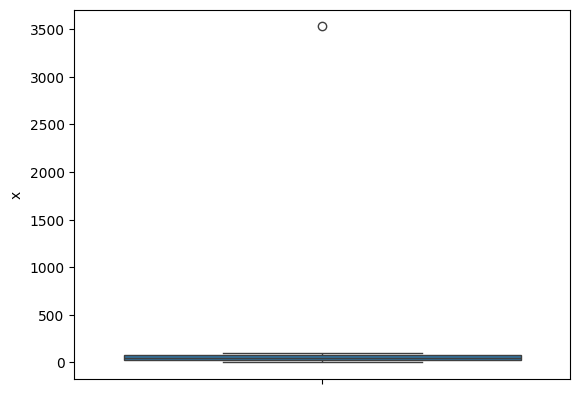

In [7]:
sns.boxplot(y=train['x'])
plt.show()

In [8]:
def extract_outliers(df,column,threshold=1.5):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-threshold*iqr
    upper_bound=q3+threshold*iqr
    outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return outliers
outliers_iqr=extract_outliers(train,'x')
print(outliers_iqr)


               x          y
213  3530.157369  49.939869


In [9]:
data_cleaned = train[~train['x'].isin(outliers_iqr['x'])]

In [10]:
x_train,y_train=data_cleaned[['x']],data_cleaned[['y']]
x_test,y_test=test[['x']],test[['y']]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
y_train_scaled=scaler.fit_transform(y_train)
y_test_scaled=scaler.fit_transform(y_test)

In [12]:
model=LinearRegression()
model.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score

In [14]:
y_pred=model.predict(x_test_scaled)
r2=r2_score(y_pred,y_test_scaled)

In [15]:
model.coef_

array([[0.99533991]])

In [16]:
model.intercept_

array([-2.28833899e-16])

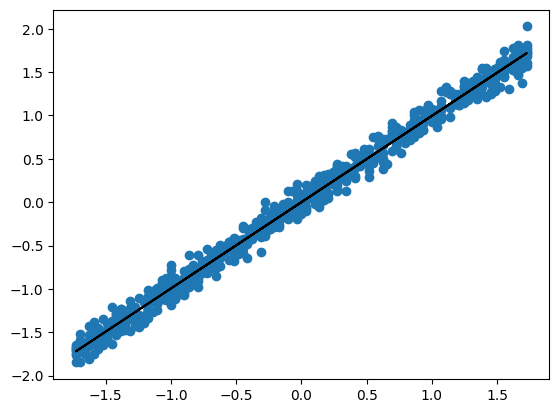

In [25]:
plt.scatter(x_train_scaled,y_train_scaled)
plt.plot(x_train_scaled,(x_train_scaled*model.coef_)+model.intercept_,'black')
plt.show()

In [18]:
r2

0.9890176103449021